In [147]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
from scipy import stats

### Survival

In [148]:
def survial_rate(data,current_year,drop_criteria):
    # data_i = data[data.first_pub_year==current_year]
    data_i = data[data.end_year==current_year]
    Q75 = np.quantile(data_i['average_group_size'],0.75)
    Q50 = np.quantile(data_i['average_group_size'],0.50)
    Q25 = np.quantile(data_i['average_group_size'],0.25)
    Q10 = np.quantile(data_i['average_group_size'],0.10)
    
    #All
    survial_all = data_i[data_i.career_len>=drop_criteria]
    survival_rate_all = len(survial_all)/len(data_i[data_i.career_len>0])
    survival_rate_all_0 = len(survial_all)/len(data_i)
    
    # G75
    G75 = data_i[data_i.average_group_size>=Q75]
    survial_75 = G75[G75.career_len>=drop_criteria]
    survival_rate_75 = len(survial_75)/len(G75[G75.career_len>0])
    survival_rate_75_0 = len(survial_75)/len(G75)
    # print('survival_rate_75,survival_rate_75_0 : ',survival_rate_75,survival_rate_75_0)

    # G25
    G25 = data_i[data_i.average_group_size<=Q25]
    # print('len_G25 : ',len(G25))
    survial_25 = G25[G25.career_len>=drop_criteria]
    # print('len_survival_25 : ',len(survial_25))
    survival_rate_25 = len(survial_25)/len(G25[G25.career_len>0])
    survival_rate_25_0 = len(survial_25)/len(G25)
    # print('survival_rate_25,survival_rate_25_0 : ',survival_rate_25,survival_rate_25_0)
    return len(data_i),len(data_i[data_i.career_len>0]),len(survial_all),survival_rate_all,survival_rate_all_0,survival_rate_75,survival_rate_75_0,survival_rate_25,survival_rate_25_0

##### mentee number and survival rate  

In [149]:
# read preprocessed data
file_path = "Source data/Fig_2.xlsx"
sheet_name = "Fig_2_ad"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [150]:
df.head()

,current_year,num_of_total_mentee,num_of_survived_mentee,survival_rate_Overall,survival_rate_BigGroup,survival_rate_SmallGroup
0,1980,2184,922,0.425592,0.422789,0.439443
1,1981,2446,1032,0.422037,0.422333,0.420680
2,1982,2485,1120,0.436309,0.417973,0.459670
3,1983,2790,1222,0.444349,0.423658,0.494162
4,1984,3149,1331,0.430333,0.398402,0.466229


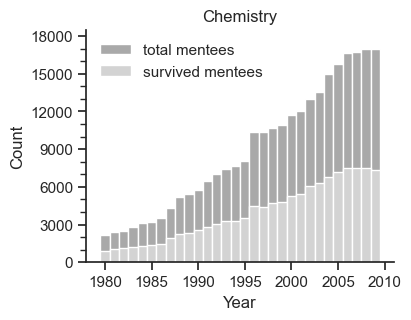

In [151]:
sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])

ax.bar(df['current_year'],df['num_of_total_mentee'],1,label='total mentees',color='darkgrey',alpha=1)
ax.bar(df['current_year'],df['num_of_survived_mentee'],1,label='survived mentees',color='lightgrey',alpha=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0,18500])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Chemistry')
ax.legend(loc=2,edgecolor='white')
ax.yaxis.set_major_locator(MultipleLocator(3000))
ax.yaxis.set_minor_locator(MultipleLocator(1000))
ax.set_xticks(ticks=np.arange(1980, 2015,5),labels=np.arange(1980, 2015,5),rotation=0)

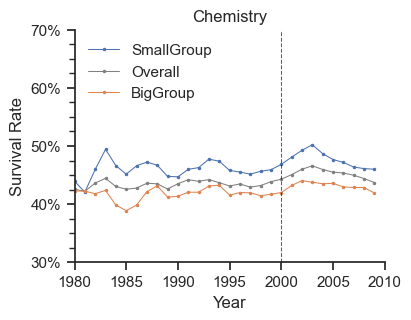

In [152]:
sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])

# data
x = list(df.current_year)
y_small = df.survival_rate_SmallGroup
y_all = df.survival_rate_Overall
y_big = df.survival_rate_BigGroup
# plot
ax.plot(x, y_small, label=f'SmallGroup', marker='.',ms=3,lw=0.75)
ax.plot(x, y_all, label=f'Overall', marker='.',color='grey',ms=3,lw=0.75)
ax.plot(x, y_big, label=f'BigGroup', marker='.',ms=3,lw=0.75)

# annotation set
ax.legend(loc=2,frameon=0)
ax.set(xlim=(x[0], 2009),
       ylim=(0.3, 0.7),
       xlabel='Year', 
       ylabel='Survival Rate',
       title=f'Chemistry'
      )
ax.set_xticks(ticks=np.arange(1980, 2015,5),labels=np.arange(1980, 2015,5),rotation=0)
ax.set_yticks(ticks=[0.3,0.4,0.5,0.6,0.7],labels=['30%','40%','50%','60%','70%'])
ax.axvline(x=2000,ls='--',color='k',alpha=0.7,lw=0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_minor_locator(MultipleLocator(1))

# ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.show()
# fig.savefig('survival_rate.pdf')

The note suggests that replicating figures Fig_2_be and Fig_2_df only requires you to use the appropriate datasets provided in the Source data file.

### Yearly Cits5

In [153]:
def average_performance(data,current_year,drop_criteria):
    group_info_2000 = data[['author_id','average_group_size','career_len','paper_num','yearly_cits','yearly_cits5',
                            'total_cits','total_cits5']][data.end_year==current_year].drop_duplicates()  
    
    num_of_mentee = len(group_info_2000)
    # print(len(group_info_2000))
    Q75 = np.quantile(group_info_2000['average_group_size'],0.75)
    Q50 = np.quantile(group_info_2000['average_group_size'],0.50)
    Q25 = np.quantile(group_info_2000['average_group_size'],0.25)
    Q10 = np.quantile(group_info_2000['average_group_size'],0.10)
    
    data_temp = []
    # BigGroup
    G75 = group_info_2000[group_info_2000.average_group_size>=Q75]
    performance_mean = G75[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5',
           'total_cits', 'total_cits5']].mean().tolist()
    performance_std = G75[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5',
           'total_cits', 'total_cits5']].std(ddof=1).tolist()
    performance_mean.extend(performance_std)
    performance_mean.append(len(G75))
    performance_mean.append(current_year)
    performance_mean.append(drop_criteria)
    performance_mean.append('BigGroup')
    performance_mean.append('AllMentee')
    
    
    G75_surviver = G75[G75.career_len>drop_criteria]
    performance_mean_surviver = G75_surviver[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5','total_cits', 'total_cits5']].mean().tolist()
    performance_std_surviver = G75_surviver[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5',
           'total_cits', 'total_cits5']].std(ddof=1).tolist()
    performance_mean_surviver.extend(performance_std_surviver)
    performance_mean_surviver.append(len(G75_surviver))
    performance_mean_surviver.append(current_year)
    performance_mean_surviver.append(drop_criteria)
    performance_mean_surviver.append('BigGroup')
    performance_mean_surviver.append('SurvivalMentee')
    
    data_temp.append(performance_mean)
    data_temp.append(performance_mean_surviver)
    
    #SmallGroup
    G25 = group_info_2000[group_info_2000.average_group_size<=Q25]
    performance_mean = G25[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5',
           'total_cits', 'total_cits5']].mean().tolist()
    performance_std = G25[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5',
           'total_cits', 'total_cits5']].std(ddof=1).tolist()
    performance_mean.extend(performance_std)
    performance_mean.append(len(G25))
    performance_mean.append(current_year)
    performance_mean.append(drop_criteria)
    performance_mean.append('SmallGroup')
    performance_mean.append('AllMentee')
    
    G25_surviver = G25[G25.career_len>drop_criteria]
    performance_mean_surviver = G25_surviver[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5','total_cits', 'total_cits5']].mean().tolist()
    performance_std_surviver = G25_surviver[['career_len', 'paper_num', 'yearly_cits', 'yearly_cits5',
           'total_cits', 'total_cits5']].std(ddof=1).tolist()
    performance_mean_surviver.extend(performance_std_surviver)
    performance_mean_surviver.append(len(G25_surviver))
    performance_mean_surviver.append(current_year)
    performance_mean_surviver.append(drop_criteria)
    performance_mean_surviver.append('SmallGroup')
    performance_mean_surviver.append('SurvivalMentee')
    
    data_temp.append(performance_mean)
    data_temp.append(performance_mean_surviver)
    
    return data_temp

In [154]:
## calculate the 95% confidence interval for mean values
# Data['yearly_cits5_std_err'] = Data['yearly_cits5_std']/np.sqrt(Data['num_of_mentee'])

# confidence_level = 0.95
# critical_value = stats.norm.ppf(0.5 + confidence_level / 2)

# margin_of_error = critical_value * Data['yearly_cits5_std_err']
# Data['yearly_cits5_margin_of_error'] = margin_of_error

##### career length

In [155]:
# read preprocessed data
file_path = "Source data/Fig_2.xlsx"
sheet_name = "Fig_2_gj"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [156]:
df.head(1)

,current_year,Big_Survival_cl_est,Big_Survival_cl_err,Small_Survival_cl_est,Small_Survival_cl_err,Big_All_cl_est,Big_All_cl_err,Small_All_cl_est,Small_All_cl_err,Big_Survival_cits5_est,Big_Survival_cits5_err,Small_Survival_cits5_est,Small_Survival_cits5_err,Big_All_cits5_est,Big_All_cits5_err,Small_All_cits5_est,Small_All_cits5_err
0,1980,31.044643,1.50879,32.971074,1.426694,9.303136,0.956017,10.069793,0.973996,61.823687,14.0893,49.054802,11.576542,34.308104,4.556115,22.054369,3.419593


Text(0.5, 1.0, 'Chemistry')

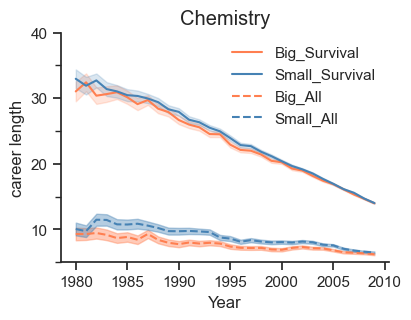

In [157]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*4,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

x = df.current_year
#SurvivalMentee
y_est = df.Big_Survival_cl_est
# survival_mentee_big.career_len
y_err = df.Big_Survival_cl_err
# survival_mentee_big.career_len_margin_of_error
ax.plot(x, y_est, '-',color='coral',label='Big_Survival')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color='coral')


y_est = df.Small_Survival_cl_est
# survival_mentee_small.career_len
y_err = df.Small_Survival_cl_err
# survival_mentee_small.career_len_margin_of_error
ax.plot(x, y_est, '-',color='steelblue',label='Small_Survival')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color='steelblue')

#ALLMentee
y_est = df.Big_All_cl_est
# all_mentee_big.career_len
y_err = df.Big_All_cl_err
# all_mentee_big.career_len_margin_of_error
ax.plot(x, y_est, '--',color='coral',label='Big_All')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.4,color='coral')

y_est = df.Small_All_cl_est
# all_mentee_small.career_len
y_err = df.Small_All_cl_err
# all_mentee_small.career_len_margin_of_error
ax.plot(x, y_est, '--',color='steelblue',label='Small_All')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.4,color='steelblue')

ax.set(ylabel='career length',xlabel='Year',
      ylim=[5,40])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

plt.legend(frameon=0,ncol=1,fontsize=11)
ax.set_title('Chemistry')

# fig.savefig('career length.pdf')

##### yearly cits5

Text(0.5, 1.0, 'Chemistry')

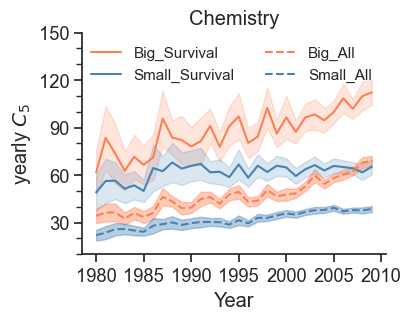

In [158]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*4,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

x = df.current_year
#SurvivalMentee
y_est = df.Big_Survival_cits5_est
# survival_mentee_big.yearly_cits5
y_err = df.Big_Survival_cits5_err
# survival_mentee_big.yearly_cits5_margin_of_error
ax.plot(x, y_est, '-',color='coral',label='Big_Survival')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color='coral')

y_est = df.Small_Survival_cits5_est
# survival_mentee_small.yearly_cits5
y_err = df.Small_Survival_cits5_err
# survival_mentee_small.yearly_cits5_margin_of_error
ax.plot(x, y_est, '-',color='steelblue',label='Small_Survival')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color='steelblue')


#ALLMentee
y_est = df.Big_All_cits5_est
# all_mentee_big.yearly_cits5
y_err = df.Big_All_cits5_err
# all_mentee_big.yearly_cits5_margin_of_error
ax.plot(x, y_est, '--',color='coral',label='Big_All')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.4,color='coral')

y_est = df.Small_All_cits5_est
# all_mentee_small.yearly_cits5
y_err = df.Small_All_cits5_err
# all_mentee_small.yearly_cits5_margin_of_error
ax.plot(x, y_est, '--',color='steelblue',label='Small_All')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.4,color='steelblue')


ax.set(ylabel='yearly $C_{5}$',xlabel='Year',
      ylim=[10,150])

plt.legend(frameon=0,ncol=2,fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_title('Chemistry')

# fig.savefig('yearly_cits5.pdf')


The note suggests that replicating figures Fig_2_hk and Fig_2_il only requires you to use the appropriate datasets provided in the Source data file.

##### relative representation of top-cited researchers

In [159]:
def Rr_5_years_window(data,current_year,drop_criteria,top_class,interval):
    group_info_2000 = data[['author_id','average_group_size','career_len','paper_num','yearly_cits','yearly_cits5',
                            'total_cits','total_cits5','end_year']][(data.end_year>current_year-interval)&(data.end_year<=current_year)].drop_duplicates()


    Q75 = np.quantile(group_info_2000['average_group_size'],0.75)
    Q25 = np.quantile(group_info_2000['average_group_size'],0.25)
    Big_survival = group_info_2000[(group_info_2000.average_group_size>=Q75)&(group_info_2000.career_len>drop_criteria)]
    Big_survival.loc[:,['Big_or_Small']] = 'BigGroup'
    # print('len(Big_survival) :',len(Big_survival))
    top_big_authors = set(Big_survival.author_id)
    original_big = len(Big_survival)
    # print('original_big :',original_big)
    Small_survival = group_info_2000[(group_info_2000.average_group_size<=Q25)&(group_info_2000.career_len>drop_criteria)]
    Small_survival.loc[:,['Big_or_Small']] = 'SmallGroup'
    # print('len(Small_survival) :',len(Small_survival))
    top_small_authors = set(Small_survival.author_id)
    original_small = len(Small_survival)
    # print('original_small :',original_small)
    # print('original_all :',original_big + original_small)

    expected_ratio_big = original_big/(original_big + original_small)
    # print('expected_ratio_big: ',expected_ratio_big)
    expected_ratio_small = original_small/(original_big + original_small)
    # print('expected_ratio_small: ',expected_ratio_small)

    # #yearly_cits5
    All_survival = group_info_2000[group_info_2000.career_len>drop_criteria].sort_values(by='yearly_cits5',ascending=0).reset_index().drop(columns=['index'])
    # print('len(All_survival): ',len(All_survival))

    
    thre = round(len(All_survival)*top_class)
    # print('thre: ',thre)

    
    top_5 = All_survival.loc[0:thre,['author_id','yearly_cits5']].drop_duplicates()
    # print('top_5_all :',len(top_5))
    top_5_Big = top_5[top_5.author_id.isin(top_big_authors)]
    # print('top_5_big :',len(top_5_Big))
    top_big = len(top_5_Big)
    top_5_Small = top_5[top_5.author_id.isin(top_small_authors)]
    # print('top_5_small :',len(top_5_Small))
    top_small = len(top_5_Small)
    # print('top_all :',top_big + top_small)
    real_ratio_big = top_big/(top_big + top_small)
    # print('real_ratio_big :',real_ratio_big)
    real_ratio_small = top_small/(top_big + top_small)
    # print('real_ratio_small :',real_ratio_small)

    relative_ratio_big = (real_ratio_big - expected_ratio_big)/expected_ratio_big
    # print('relative_ratio_big: ',relative_ratio_big)

    relative_ratio_small = (real_ratio_small - expected_ratio_small)/expected_ratio_small
    # print('relative_ratio_small: ',relative_ratio_small)
    
    return current_year,relative_ratio_big,relative_ratio_small,top_class

In [160]:
# read preprocessed data
file_path = "Source data/Fig_3.xlsx"
sheet_name = "Fig3_a"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [161]:
df

,current_year,Rr_big,Rr_small
0,top 5%,0.336855,-0.297860
1,top 10%,0.294633,-0.260526
2,top 25%,0.223875,-0.197959
3,top 50%,0.132482,-0.117146


Text(0.5, 1.0, 'Chemistry')

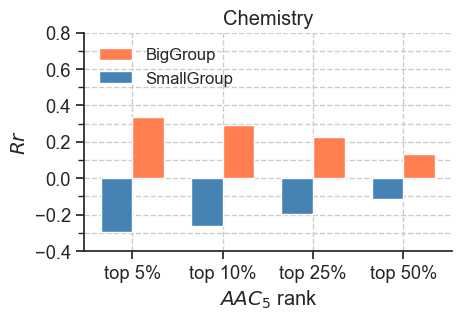

In [162]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.9*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')
RB = list(df.Rr_big)
RS = list(df.Rr_small)
y_b = [round(j,2) for j in RB]
y_s = [round(j,2) for j in RS]
X_ticks = ['top 5%','top 10%','top 25%','top 50%']
width = 0.35
x = np.array(range(4))


rects1 = ax.bar(x+width/2,RB,width,label='BigGroup',color='coral')
rects2 = ax.bar(x-width/2,RS,width,label='SmallGroup',color='steelblue')
ax.set_ylabel('$Rr$')
ax.set_xlabel('$AAC_{5}$ rank')
c = ax.set_xticks(ticks=x,labels=X_ticks,rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# Y_ticks = [-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5]
# ty = [-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5]
# c = ax.set_yticks(ticks=ty,labels=Y_ticks,fontsize=12)

ax.set_ylim([-0.40,+0.80])
legend = ax.legend(loc='upper left',fontsize=12,frameon=0)
ax.grid(True,which='both',ls="--")
ax.set_title('Chemistry')
# fig.savefig('Rr(chemistry).pdf')

The note suggests that replicating figures Fig3_b and Fig3_c only requires you to use the appropriate datasets provided in the Source data file.

### Fecundity

Please use the code in 'define group.py' to identify the fecundity of G1 mentees.

##### average fecundity

In [163]:
def all_mean_error_p(data_i):
    
    #BigGroup
    data_i_q75 = data_i['author_cumulative_fecundity'][data_i.group_cohort=='BigGroup']
    data_i_q75_mean=np.mean(data_i_q75)
    data_i_q75_median=np.median(data_i_q75)
    data_i_q75_std=np.std(data_i_q75,ddof=1)
    n_q75 = len(data_i_q75)
    error_q75 = data_i_q75_std/np.sqrt(n_q75)
    
    #SmallGroup
    data_i_q25 = data_i['author_cumulative_fecundity'][data_i.group_cohort=='SmallGroup']
    data_i_q25_mean=np.mean(data_i_q25)
    data_i_q25_median=np.median(data_i_q25)
    data_i_q25_std=np.std(data_i_q25,ddof=1)
    n_q25 = len(data_i_q25)
    error_q25 = data_i_q25_std/np.sqrt(n_q25)
    
    # u Test
    data1 = data_i_q75
    data2 = data_i_q25
    u_statistic, p_value = stats.mannwhitneyu(data1, data2)
    
    return data_i_q75_mean,data_i_q25_mean,error_q75,error_q25,p_value,data_i_q75_median,data_i_q25_median
    

def survival_mean_error_p(data_i):
    
    #BigGroup
    data_i_q75 = data_i['author_cumulative_fecundity'][(data_i.group_cohort=='BigGroup')&(data_i.career_len>10)]
    data_i_q75_mean=np.mean(data_i_q75)
    data_i_q75_median=np.median(data_i_q75)
    data_i_q75_std=np.std(data_i_q75,ddof=1)
    n_q75 = len(data_i_q75)
    error_q75 = data_i_q75_std/np.sqrt(n_q75)
    
    #SmallGroup
    data_i_q25 = data_i['author_cumulative_fecundity'][(data_i.group_cohort=='SmallGroup')&(data_i.career_len>10)]
    data_i_q25_mean=np.mean(data_i_q25)
    data_i_q25_median=np.median(data_i_q25)
    data_i_q25_std=np.std(data_i_q25,ddof=1)
    n_q25 = len(data_i_q25)
    error_q25 = data_i_q25_std/np.sqrt(n_q25)
    
    # u Test
    data1 = data_i_q75
    data2 = data_i_q25
    u_statistic, p_value = stats.mannwhitneyu(data1, data2)
    
    return data_i_q75_mean,data_i_q25_mean,error_q75,error_q25,p_value,data_i_q75_median,data_i_q25_median

In [164]:
# read preprocessed data
file_path = "Source data/Fig_3.xlsx"
sheet_name = "Fig3_d"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [165]:
df.columns = ['variable','value']

In [166]:
df

,variable,value
0,allBig_mean,4.288230e+00
1,allBig_std,1.169188e-01
2,allSmall_mean,4.968434e+00
3,allSmall_std,1.053248e-01
4,all_p_value,1.220000e-91
5,survivalBig_mean,3.067285e+01
6,survivalSmall_mean,2.267290e+01
7,survivalSmall_std,1.169190e-01
8,survivalBig_std,6.567032e-01
9,survival_p_value,1.440000e-27


In [167]:
p_all = 1.22e-91
p_survival = 1.44e-27

Text(0.5, 1.0, 'Chemsitry')

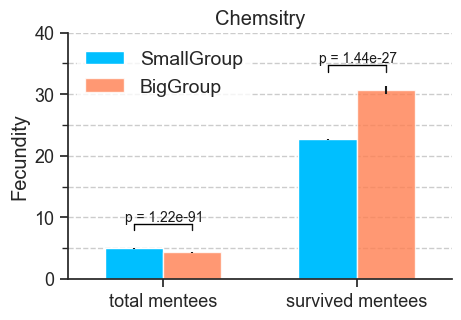

In [168]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.9*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

ff = 'chemistry'

n_smallGroup = df['value'][df.variable=='allSmall_mean'].tolist()[0]
# test_res[ff]['allSmall'] 
n_smallGroup1 = df['value'][df.variable=='survivalSmall_mean'].tolist()[0]
# test_res[ff]['survivalSmall']
n_bigGroup = df['value'][df.variable=='allBig_mean'].tolist()[0]
# test_res[ff]['allBig']
n_bigGroup1 = df['value'][df.variable=='survivalBig_mean'].tolist()[0]
# test_res[ff]['survivalBig']
a_SD0 = df['value'][df.variable=='allSmall_std'].tolist()[0]
# test_res[ff]['a_SD0']
a_SD1 = df['value'][df.variable=='survivalSmall_std'].tolist()[0]
# test_res[ff]['a_SD1']
b_SD0 = df['value'][df.variable=='allBig_std'].tolist()[0]
# test_res[ff]['b_SD0']
b_SD1 = df['value'][df.variable=='survivalBig_std'].tolist()[0]
# test_res[ff]['b_SD1']  

size=2
x=np.arange(size)
a=[n_smallGroup,n_smallGroup1]
a_SD=[a_SD0,a_SD1]
b=[n_bigGroup,n_bigGroup1]
b_SD=[b_SD0,b_SD1]

overall_width,n=0.6,2
width=overall_width/n
x=x-(overall_width-width)/2
labels=['total mentees','survived mentees']
ax.set_ylabel('Fecundity')
ax.set_ylim([0,40])

ax.bar(x,a,width=width,yerr=a_SD,tick_label=labels,label='SmallGroup',color='deepskyblue')
ax.bar(x+width,b,width=width,yerr=b_SD,tick_label=labels,label='BigGroup',alpha=0.8,color='coral')
ax.bar(x+width/2,[0,0],tick_label=labels)
ax.tick_params(labelsize=13)
ax.legend(loc='upper left',edgecolor='white',fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#添加显著性检验结果 (significance test result)
#SmallGroup
at = 0.15
x = [at,at,at]
at1 = np.mean(n_smallGroup) + 3
y = [at1,at1+0.1,at1+1]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = -0.15
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = -0.15
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+1
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

x0 = -0.05
y0 = at1
ax.annotate(f'p = {p_all}', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")
#BigGroup
at = 1.15
x = [at,at,at]
at1 = np.mean(n_bigGroup1) + 3
y = [at1,at1+0.1,at1+1]
ax.plot(x,y,label="$y$",color="k",linewidth=1)

at = 0.85
x = [at,at,at]
# at1 = 2.2
y = [at1,at1+0.1,at1+1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)

at = 0.85
x = [at,at+0.1,at+0.2,at+0.3]
at1 = at1+1
y = [at1,at1,at1,at1]
ax.plot(x,y,label="$y$",color="black",linewidth=1)


x0 = 0.95
y0 = at1
# ax.annotate(r'%s'%'***', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
#              textcoords='offset points', fontsize=10,color="k")
ax.annotate(f'p = {p_survival}', xy=(x0, y0), xycoords='data', xytext=(-20, +2),
             textcoords='offset points', fontsize=10,color="k")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.grid(True,ls="--",which='both',axis='y')
ax.set_title('Chemsitry')
# fig.savefig('final figs/average_fecundity(chemistry).pdf')

The note suggests that replicating figures Fig3_e and Fig3_f only requires you to use the appropriate datasets provided in the Source data file.

##### fecundity distribution

main plot

In [169]:
# read preprocessed data
file_path = "Source data/Fig_3.xlsx"
sheet_name = "Fig3_g"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [170]:
df.head()

,x_values,y_big,y_small
0,1,0.135590,0.170301
1,2,0.127333,0.154226
2,3,0.122048,0.143562
3,4,0.116928,0.134331
4,5,0.110652,0.127487


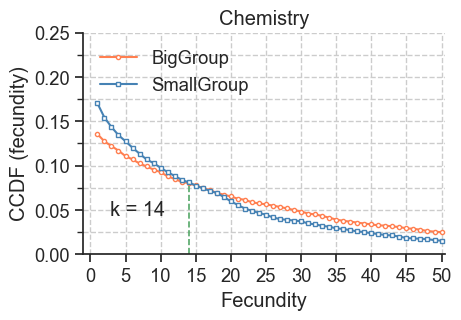

In [171]:
X0 = np.array(df.x_values.tolist())
Y2 = np.array(df.y_big.tolist())
y2 = np.array(df.y_small.tolist())

fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.9*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')
X0 = X0
x0 = X0
# ax.semilogy(X0,Y2,label='BigGroup',color='coral',marker='o',ls='-',markerfacecolor='white') 
# ax.semilogy(x0,y2,label='SmallGroup',color='steelblue',marker='o',ls='-',markerfacecolor='white',alpha=0.8)
ax.plot(X0,Y2,label='BigGroup',color='coral',marker='o',ls='-',markerfacecolor='white',ms=3) 
ax.plot(x0,y2,label='SmallGroup',color='steelblue',marker='s',ls='-',markerfacecolor='white',ms=3)
ax.set_xlim([-1,50.5])
ax.set_ylim([0,0.25])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
thre = 14
height = df['y_big'][df.x_values==thre].tolist()[0]
ax.plot([thre,thre],[0.00,height],ls='--',c='g',lw=1.2)
ax.text(0.15, 0.2,'k = '+str(thre), ha='center', va='center', transform=ax.transAxes)
ax.grid(True,ls="--",which='both')
ax.set_title(f'Chemistry')
ax.set_xlabel('Fecundity')
ax.set_ylabel('CCDF (fecundity)')
plt.legend(frameon=0,loc=2)
# fig.savefig(f'distribution(Chemistry)({start}~{end}).pdf')

inset

In [172]:
# read preprocessed data
file_path = "Source data/Fig_3.xlsx"
sheet_name = "Fig3_g_inset"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [173]:
df

,decades,k
0,1980s -,26
1,1980s +,18
2,1990s -,14
3,1990s +,12


Text(0, 0.5, 'k')

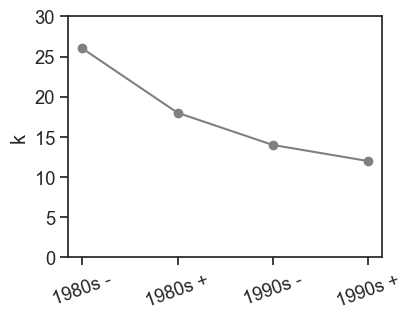

In [174]:
K = [26,18,14,12]
X = [1,2,3,4]
X_ticks = ['1980s -','1980s +','1990s -','1990s +']
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.8*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

ax.plot(X,K,marker='o',c='grey')
ax.set_ylim([0,30])
c = ax.set_xticks(ticks=X,labels=X_ticks,rotation=20)
ax.set_ylabel('k')
# fig.savefig(f'k_evolution(Chemistry).pdf')

The note suggests that replicating figures Fig3_h and Fig3_i only requires you to use the appropriate datasets provided in the Source data file.

### Regression result

Please use the CEM algorithm and regression methods in R to perform the regression analysis and obtain the results reported in 'Fig_4.xlsx' located in the Source data folder.

### Publication and Collaboration Disparity

mentor's productivity

In [175]:
# read preprocessed data
file_path = "Source data/Fig_5.xlsx"
sheet_name = "Fig5_a"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [176]:
df.head()

,x_big,y_big,x_small,y_small
0,2,1.0,2,0.997561
1,4,1.0,4,0.985536
2,6,1.0,6,0.964257
3,8,1.0,8,0.932735
4,10,1.0,10,0.890657


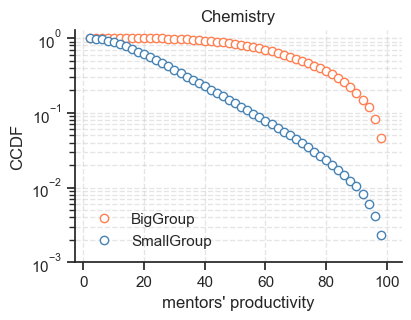

In [177]:
sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])
x_big = df.x_big
y_big = df.y_big
x_small = df.x_small
y_small = df.y_small
ax.semilogy(x_big,y_big,label='BigGroup',color='coral',marker='o',ls='',alpha=1,markerfacecolor='white')
ax.semilogy(x_small,y_small,label='SmallGroup',color='steelblue',marker='o',ls='',alpha=1,markerfacecolor='white')

# ax.loglog(x0[1:len(x0)],1-Y0,label='BigGroup',color='coral',marker='o',ls='',alpha=1,markerfacecolor='white')
# ax.loglog(x1[1:len(x1)],1-Y1,label='SmallGroup',color='steelblue',marker='o',ls='',alpha=1,markerfacecolor='white')
ax.set_ylim([0.001,1.3])
ax.set_xlabel('mentors\' productivity')
ax.set_ylabel('CCDF')
ax.grid(True,which="both", ls="--",alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Chemistry')
legend = ax.legend(loc='lower left',frameon=False)
# fig.savefig('mentors productivity(chemistry).pdf')

first_authored publication

In [178]:
# read preprocessed data
file_path = "Source data/Fig_5.xlsx"
sheet_name = "Fig5_d"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [179]:
df.columns = ['variable','value']

In [180]:
df

,variable,value
0,dropout_small_mean,1.021355e+00
1,dropout_small_std,5.369781e-03
2,dropout_big_mean,9.313676e-01
3,dropout_big_std,6.166829e-03
4,survival_small_mean,2.107103e+00
5,survival_small_std,1.489031e-02
6,survival_big_mean,2.194547e+00
7,survival_big_std,1.914742e-02
8,p_value_dropout,2.364112e-277
9,p_value_survival,1.714341e-09


Text(0.5, 1.0, 'Chemistry')

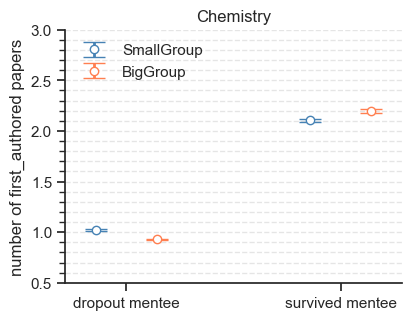

In [181]:
sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])
x0 = 1
x1 = 2

y_mean = df['value'][df.variable=='dropout_small_mean']
y_std = df['value'][df.variable=='dropout_small_std']
ax.errorbar(x0, y_mean, y_std, fmt='o', linewidth=2, capsize=8,markersize=6,
            markerfacecolor='white',markeredgecolor='steelblue',ecolor='steelblue',alpha=1,label='SmallGroup')

y_mean = df['value'][df.variable=='dropout_big_mean']
y_std = df['value'][df.variable=='dropout_big_std']
ax.errorbar(x1, y_mean, y_std, fmt='o', linewidth=2, capsize=8,markersize=6,
            markerfacecolor='white',markeredgecolor='coral',ecolor='coral',alpha=1,label='BigGroup')

x0 = 4.5
x1 = 5.5

y_mean = df['value'][df.variable=='survival_small_mean']
y_std = df['value'][df.variable=='survival_small_std']
ax.errorbar(x0, y_mean, y_std, fmt='o', linewidth=2, capsize=8,markersize=6,
            markerfacecolor='white',markeredgecolor='steelblue',ecolor='steelblue',alpha=1)
y_mean = df['value'][df.variable=='survival_big_mean']
y_std = df['value'][df.variable=='survival_big_std']
ax.errorbar(x1, y_mean, y_std, fmt='o', linewidth=2, capsize=8,markersize=6,
            markerfacecolor='white',markeredgecolor='coral',ecolor='coral',alpha=1)

# ax.xaxis.set_major_locator(MultipleLocator(2))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set(xlim=[0.5,6],ylim=[0.5,3],ylabel='number of first_authored papers')

plt.xticks([1.5,5],labels=['dropout mentee','survived mentee'])
ax.grid(True,which="both", ls="--",alpha=0.5,axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc=2,frameon=0)
plt.title('Chemistry')
# plt.savefig('first_author paper/average_number.pdf')

([<matplotlib.axis.XTick at 0x303d57a90>,
 [Text(1, 0, 'SmallGroup'), Text(2, 0, 'BigGroup')])

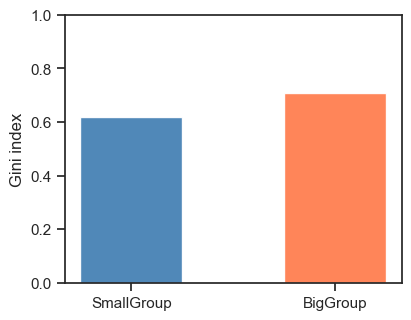

In [182]:
sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])

gini_small = df['value'][df.variable=='gini_small']
gini_big = df['value'][df.variable=='gini_big']

x = 1
y = gini_small
ax.bar(x, y, width=0.5 ,color='steelblue', capsize=3,label='SmallGroup',alpha=0.95)

x = 2
y = gini_big
ax.bar(x, y,width=0.5, color='coral', capsize=3,label='Biggroup',alpha=0.95)


# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set(ylim=[0,1])
# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(5))

# plt.xlabel('Quantile of Group Size')
plt.ylabel('Gini index')
# plt.title('Neuroscience')
# plt.legend(loc='upper left',frameon=0)
plt.xticks([1,2],labels=['SmallGroup','BigGroup'])

# plt.savefig('first_author paper/gini_index.pdf')aaa

The note suggests that replicating figures Fig5_e and Fig5_f only requires you to use the appropriate datasets provided in the Source data file.

### Institution Disparity

##### Survival

In [183]:
# read preprocessed data
file_path = "Source data/Fig_6.xlsx"
sheet_name = "Fig6_a"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [184]:
df

,QS_rank,BigGroup,SmallGroup,Sample_size
0,"QS [0,50]",0.454654,0.511317,57019
1,"QS [50,100]",0.402154,0.476414,25280
2,"QS [100,200]",0.408182,0.459600,40763
3,"QS [200,500]",0.398304,0.435278,45664
4,"QS [500,1500]",0.378820,0.403179,25962


Text(0.5, 1.0, 'Chemistry')

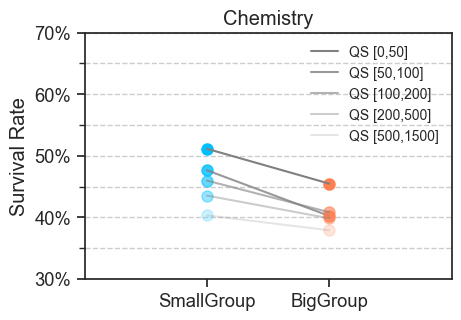

In [185]:
sns.set(style='ticks',font_scale=1.2, font='Arial')
fig = plt.figure(constrained_layout=True,figsize=[0.9*5,0.618*5])
#survival rate
ax = fig.add_subplot(1,1,1)
x0 = 2
x1 = 3
# Markers = ['o','v','s','d','+']
for i in range(len(df)):
    SR_small = df.loc[i,'SmallGroup']
    SR_big = df.loc[i,'BigGroup']
    ax.plot(x0,SR_small,marker='o',ms=8,color='deepskyblue',alpha=1-0.2*i)
    ax.plot(x1,SR_big,marker='o',ms=8,color='coral',alpha=1-0.2*i)
    ax.plot([x0,x1],[SR_small,SR_big],c='gray',alpha=1-0.2*i,label=df.loc[i,'QS_rank'])


ax.set(ylim=[0.3,0.70],xlim=[1,4],ylabel='Survival Rate')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(True,ls="--",which='both',axis='y')
plt.xticks([x0,x1],labels=['SmallGroup','BigGroup'])
ax.set_yticks(ticks=[0.3,0.4,0.5,0.6,0.7],labels=['30%','40%','50%','60%','70%'])
plt.legend(frameon=0,loc='upper right',fontsize=10)
plt.title('Chemistry')

##### Yearly cits5

In [186]:
# read preprocessed data
file_path = "Source data/Fig_6.xlsx"
sheet_name = "Fig6_d"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [187]:
# df

In [188]:
QS_sr = df.loc[:9,['yearly_cits5','yearly_cits5_se','Big_or_Small']]

In [189]:
QS_sr

,yearly_cits5,yearly_cits5_se,Big_or_Small
0,116.482978,1.317812,BigGroup
1,86.143703,1.680713,SmallGroup
2,96.075185,1.808239,BigGroup
3,67.461495,1.896753,SmallGroup
4,81.414394,1.251789,BigGroup
5,64.686809,1.423839,SmallGroup
6,77.04925,1.270637,BigGroup
7,57.810937,1.16939,SmallGroup
8,75.044761,1.872611,BigGroup
9,45.599828,1.095694,SmallGroup


In [190]:
QS_sr['QS_rank'] = ['QS [0,50)','QS [0,50)','QS [50,100)','QS [50,100)','QS [100,200)','QS [100,200)',
                    'QS [200,500)','QS [200,500)','QS [500,1500)','QS [500,1500)']

In [191]:
QS_sr = QS_sr.values.tolist()

Text(0.5, 1.0, 'Chemistry')

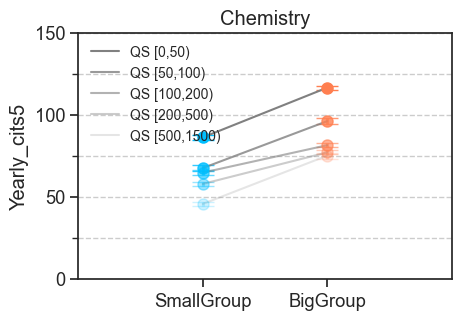

In [192]:
sns.set(style='ticks',font_scale=1.2, font='Arial')
fig = plt.figure(constrained_layout=True,figsize=[0.9*5,0.618*5])
ax = fig.add_subplot(1,1,1)
#survival rate
x0 = 2.0
x1 = 3.0
# Markers = ['o','v','s','d','+']
list_l = [0,2,4,6,8]
for i in list_l:
    x = [x0,x1]
    y = [QS_sr[i+1][0],QS_sr[i][0]]
    yerr = [QS_sr[i+1][1],QS_sr[i][1]]
    ax.errorbar(x[0], y[0], yerr[0], fmt='o', linewidth=2, capsize=8,markersize=8,color='deepskyblue',alpha=1-0.1*i)
    ax.errorbar(x[1], y[1], yerr[1], fmt='o', linewidth=2, capsize=8,markersize=8,color='coral',alpha=1-0.1*i)
    
    # ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6,colors=['deepskyblue','coral'])
    ax.plot([x[0],x[1]],[y[0],y[1]],c='gray',alpha=1-0.1*i,label=QS_sr[i][-1]) #,alpha=1-0.2*i,label=QS_sr[i][0]


ax.set(ylim=[0,150],xlim=[1,4],ylabel='Yearly_cits5')
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.grid(True,ls="--",which='both',axis='y')
plt.xticks([x0,x1],labels=['SmallGroup','BigGroup'])
# ax.set_yticks(ticks=[0.3,0.4,0.5,0.6,0.7],labels=['30%','40%','50%','60%','70%'])
plt.legend(frameon=0,loc='upper left',fontsize=10)
# fig.savefig('institution/yearly_cits5.pdf')
plt.title('Chemistry')

##### Fecundity

In [193]:
# read preprocessed data
file_path = "Source data/Fig_6.xlsx"
sheet_name = "Fig6_g"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [194]:
# df

In [195]:
QS_sr = df.loc[:9,['Mean','Std','Type','QS_rank']]
QS_sr = QS_sr.values.tolist()

In [196]:
QS_sr

[[35.6093023255813, 1.16083948714184, 'BigGroup', 'QS [0,50)'],
 [26.3315003927729, 0.780394492838853, 'SmallGroup', 'QS [0,50)'],
 [28.641447368421, 1.91732997231037, 'BigGroup', 'QS [50,100)'],
 [22.6196868008948, 1.2428573162778, 'SmallGroup', 'QS [50,100)'],
 [27.0374449339207, 1.53941950986792, 'BigGroup', 'QS [100,200)'],
 [23.3026706231454, 1.11309721027391, 'SmallGroup', 'QS [100,200)'],
 [29.1162162162162, 2.09020554561057, 'BigGroup', 'QS [200,500)'],
 [21.2012345679012, 0.85348763688171, 'SmallGroup', 'QS [200,500)'],
 [24.3417721518987, 4.51205195146362, 'BigGroup', 'QS [500,1500)'],
 [18.7427884615384, 1.18957151489466, 'SmallGroup', 'QS [500,1500)']]

Text(0.5, 1.0, 'Chemistry')

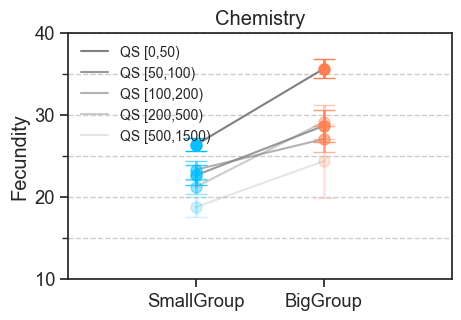

In [197]:
sns.set(style='ticks',font_scale=1.2, font='Arial')
fig = plt.figure(constrained_layout=True,figsize=[0.9*5,0.618*5])
#survival rate
ax = fig.add_subplot(1,1,1)
x0 = 2
x1 = 3
# Markers = ['o','v','s','d','+']
list_l = [0,2,4,6,8]
for i in list_l:
    
    x = [x0,x1]
    y = [QS_sr[i+1][0],QS_sr[i][0]]
    yerr = [QS_sr[i+1][1],QS_sr[i][1]]
    ax.errorbar(x[0], y[0], yerr[0], fmt='o', linewidth=2, capsize=8,markersize=8,color='deepskyblue',alpha=1-0.1*i)
    ax.errorbar(x[1], y[1], yerr[1], fmt='o', linewidth=2, capsize=8,markersize=8,color='coral',alpha=1-0.1*i)
    
    # ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6,colors=['deepskyblue','coral'])
    ax.plot([x[0],x[1]],[y[0],y[1]],c='gray',alpha=1-0.1*i,label=QS_sr[i][-1]) #,alpha=1-0.2*i,label=QS_sr[i][0]


ax.set(ylim=[10,40],xlim=[1,4],ylabel='Fecundity')
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.grid(True,ls="--",which='both',axis='y')
plt.xticks([x0,x1],labels=['SmallGroup','BigGroup'])
# ax.set_yticks(ticks=[0.3,0.4,0.5,0.6,0.7],labels=['30%','40%','50%','60%','70%'])
plt.legend(frameon=0,loc='upper left',fontsize=10)
# fig.savefig('institution/fencundity.pdf')
plt.title('Chemistry')

The note suggests that replicating figures Fig6_bhe and Fig6_cfi only requires you to use the appropriate datasets provided in the Source data file.